In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=ed44ca8c9df262e29b8c7c271813188a29e72bd04263310879db232fd7ba4916
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"negreaclaudiu","key":"414b3b4f314a0eec132b78a5db10599c"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Download the dataset**

In [5]:
!kaggle competitions download -c cassava-leaf-disease-classification

100% 5.76G/5.76G [02:19<00:00, 22.3MB/s]
100% 5.76G/5.76G [02:20<00:00, 44.2MB/s]


**Unzip it**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cassava-leaf-disease-classification.zip", 'r')
zip_ref.extractall('sample_data')
zip_ref.close()

Read the csv file which maps images paths to their label

In [ ]:
train_images = '/content/sample_data/train_images'
data_df = pd.read_csv("/content/sample_data/train.csv")

data_df = data_df.sample(frac = 1)
data_df['path'] = train_images + "/" + data_df['image_id']

data_df['label'].values.astype(int)
data_df.head()

total_samples = len(data_df)
print("There are {} total samples".format(total_samples))

There are 21397 total samples


In [ ]:
classes_dict = {"0": "Cassava Bacterial Blight  (CBB)", "1": "Cassava Brown Streak Disease  (CBSD)", "2": "Cassava Green Mottle  (CGM)", "3": "Cassava Mosaic Disease  (CMD)", "4": "Healthy"}
sizes = data_df['label'].value_counts()
classes = [ 3, 4, 2, 1, 0]
classes_name = [classes_dict[str(c)] for c in classes]

**Images distribution**

[]

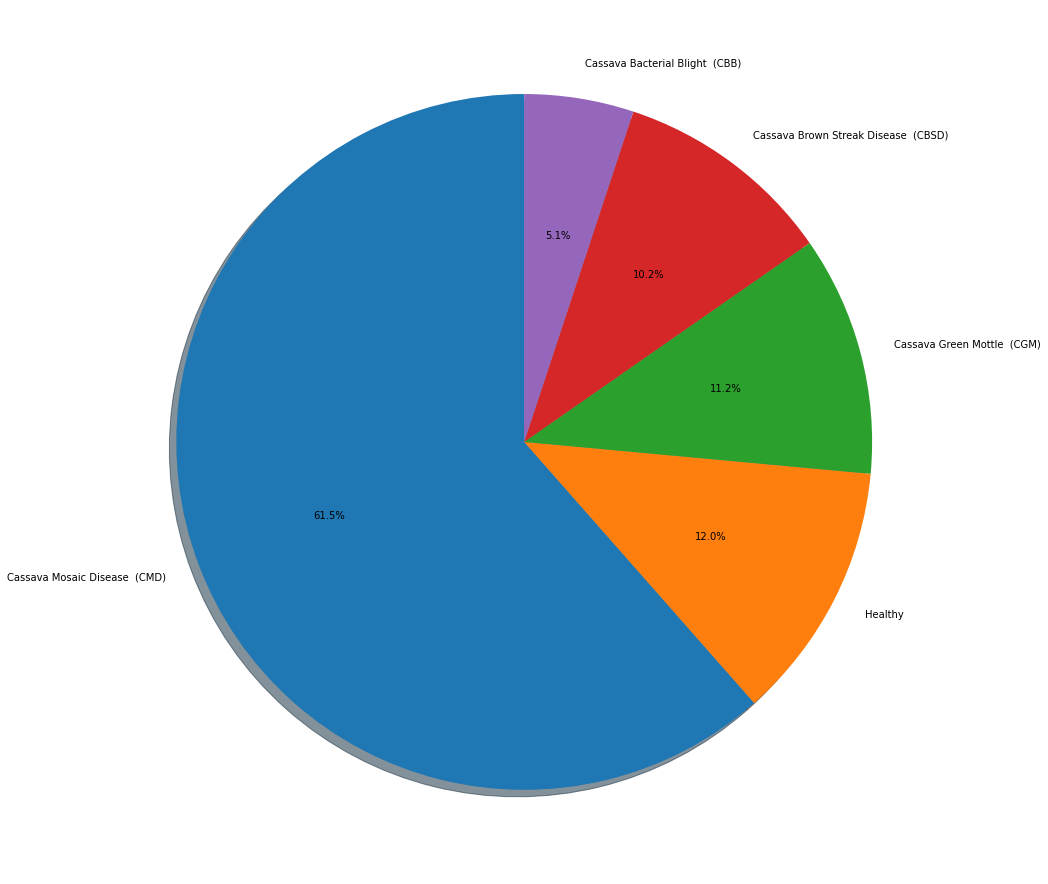

In [ ]:
plt.figure(figsize=(16, 16))
plt.pie(sizes, labels = classes_name, autopct='%1.1f%%',shadow=True, startangle=90)
plt.plot()

In [ ]:
cbb = data_df.loc[data_df['label'] == 0]
cbsd = data_df.loc[data_df['label'] == 1]
cgm = data_df.loc[data_df['label'] == 2]
cmd = data_df.loc[data_df['label'] == 3]
healthy = data_df.loc[data_df['label'] == 4]


[Pdf Cassava Diseases Description](https://cava2.org/presentations/Diseases%20and%20Pests%20of%20Cassava.pdf)

http://www.pestnet.org/fact_sheets/search.html?zoom_query=Cassava

**Exploring the diseases:**

Cassava Bacterial Blight(CBB)

• Symptoms on leaves:
* Angular leaf spots on cassava
* droplets of exudates on the spots
* Wilting of young leaves followed by shoot die back
* Leaf spots, blights

• Symptoms on stem:
*  Brown/black lesions lesions on a cassava cassava stem
* formation of gummy exudate and
* Stem die back
* Complete defoliation resulting in ‘candle stick’ effect

•Detection & Inspection
* Look to see if leaves are drying and dying early.
* Look for angular spots on the leaves, and cut out small pieces of the leaf from the edge of the spots and place them in a drop of water.
* Look for bacterial streaming - the streaming appears as white streaks in the water.
* Look for dark brown to black streaks on the green part of the stem, and for the presence of sticky liquid.
* Look for browning in the vascular tissues, i.e., the water conducting tubes, after peeling the bark and splitting the stem.




In [ ]:
 cbb = cbb.sample(frac = 1) # shuffling
 images = cbb['path'][:25].values
 i = 0
 plt.figure(figsize=(20, 20))
 for imgPath in images:
  ax = plt.subplot(5, 5, i + 1)
  i += 1
  img = Image.open(imgPath)
  plt.imshow(img)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.


Cassava Brown Streak Disease (CBSD)
1. include yellowing (leaf chlorosis) and
2. streaks streaks in the stem bark (cortex).
3. Infected tubers have brown streaks (root necrosis)

In [ ]:
cbsd = cbsd.sample(frac = 1) # shuffling
images = cbsd['path'][:25].values
i = 0
plt.figure(figsize=(20, 20))
for imgPath in images:
  ax = plt.subplot(5, 5, i + 1)
  i += 1
  img = Image.open(imgPath)
  plt.imshow(img)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

Cassava Green Mottle (CGM)
* Young leaves are puckered with faint to distinct yellow spots , green patterns (mosaics), and twisted margins 
* Usually, the shoots recover from symptoms and appear healthy.
* Occasionally, plants become severely stunted, edible roots are absent or, if present, they are small and woody when cooked.

Detection & Inspection:
* Look for yellow patterns on the leaves, from small dots to irregular patches of yellow and green.
* Look for leaf margins that are distorted. The plants may be stunted.

In [ ]:
cgm = cgm.sample(frac = 1) # shuffling
images = cgm['path'][:25].values
i = 0
plt.figure(figsize=(20, 20))
for imgPath in images:
  ax = plt.subplot(5, 5, i + 1)
  i += 1
  img = Image.open(imgPath)
  plt.imshow(img)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

Cassava Mosaic Disease (CMD)
* Light green, yellow or white patches patches on
the leaves
* Wrinkling of leaves
* Shrinking of leaves
* Stunted plants

In [ ]:
cmd = cmd.sample(frac = 1) # shuffling
images = cmd['path'][:25].values
i = 0
plt.figure(figsize=(20, 20))
for imgPath in images:
  ax = plt.subplot(5, 5, i + 1)
  i += 1
  img = Image.open(imgPath)
  plt.imshow(img)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

Healthy plants

In [ ]:
healthy = healthy.sample(frac = 1) # shuffling
images = healthy['path'][:25].values
i = 0
plt.figure(figsize=(20, 20))
for imgPath in images:
  ax = plt.subplot(5, 5, i + 1)
  i += 1
  img = Image.open(imgPath)
  plt.imshow(img)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

Roots

In [ ]:
imgsRoots = [ '1004389140.jpg','1008244905.jpg','1010470173.jpg','1014492188.jpg','1338159402.jpg','1339403533.jpg','1359893940.jpg','1366430957.jpg','1403621003.jpg','159654644.jpg','1689510013.jpg','1770746162.jpg','1773381712.jpg',
              '1848686439.jpg','1905119159.jpg','1917903934.jpg','1960041118.jpg','199112616.jpg','2073193450.jpg','2074713873.jpg','2084868828.jpg','2166623214.jpg','2182500020.jpg','2262263316.jpg','2276509518.jpg','2278166989.jpg',
              '2320471703.jpg','2321669192.jpg','2382642453.jpg','2415837573.jpg','2604713994.jpg','262902341.jpg','2642216511.jpg','2698282165.jpg','2719114674.jpg','274726002.jpg','2925605732.jpg','2981404650.jpg','3040241097.jpg',
              '3043097813.jpg','3123906243.jpg','3126296051.jpg','3199643560.jpg','3251960666.jpg','3252232501.jpg','3425850136.jpg','3435954655.jpg','3477169212.jpg','3609350672.jpg','3609986814.jpg','3652033201.jpg','3724956866.jpg',
              '3746679490.jpg','3810809174.jpg','3838556102.jpg','3881028757.jpg','3892366593.jpg','3957807023.jpg','3966432707.jpg','4060987360.jpg','4089218356.jpg', '4134583704.jpg','4203623611.jpg','421035788.jpg','4239074071.jpg','4269208386.jpg','457405364.jpg',
              '549854027.jpg','554488826.jpg','580111608.jpg','600736721.jpg','616718743.jpg','695438825.jpg','723564013.jpg','746746526.jpg','826231979.jpg','847847826.jpg','9224019.jpg','927165736.jpg','992748624.jpg']
imgsRootsPaths = [ "/content/sample_data/train_images/" + img for img in imgsRoots ]

rootsLabels = []

for root in imgsRootsPaths:
  try:
    label = int(data_df.loc[data_df['path'] == root]['label'])
    rootsLabels.append(label)
  except:
    print(root)




tf

In [ ]:

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 10,
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [ ]:
plt.figure(figsize = (20, 20))
for i, path in enumerate(imgsRootsPaths):
  img = Image.open(path)
  ax = plt.subplot(9, 9, i + 1)
  ax.set_title(classes_dict[str(rootsLabels[i])][-7:], )
  plt.imshow(img)
  plt.axis("off")



Output hidden; open in https://colab.research.google.com to view.

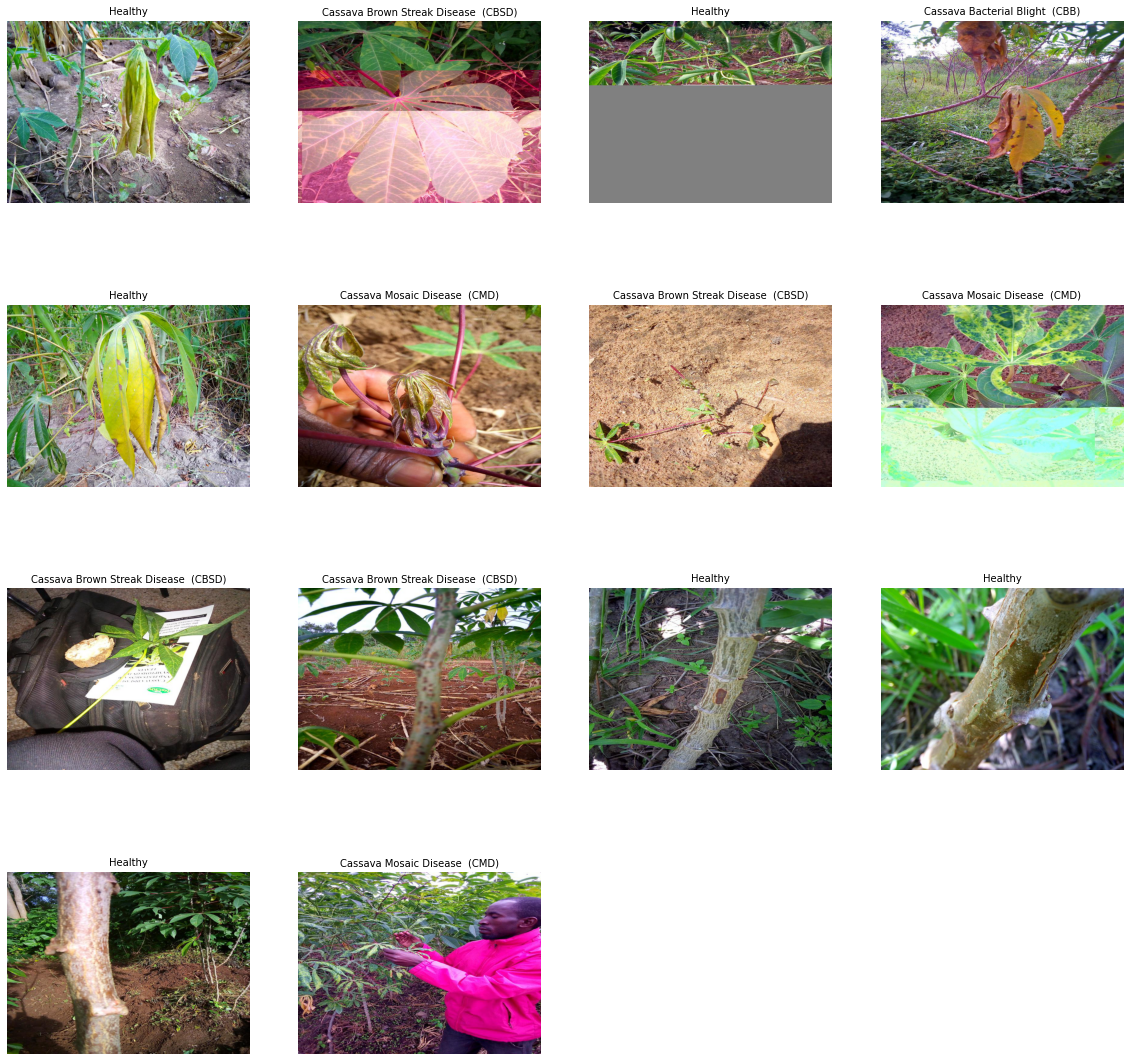

In [ ]:
other_images = [ 241616775, 314640668, 1886828385, 381935936, 424257956, 725034194, 2142361151, 3238801760, 2489013604, 2099754293, 1862072615, 1709404074, 744383303, 4280523848]
imgsPaths = [ "/content/sample_data/train_images/" + str(n) + ".jpg" for n in other_images ]

otherLabels = []

for image in imgsPaths:
  try:
    label = int(data_df.loc[data_df['path'] == image]['label'])
    otherLabels.append(label)
  except:
    print(image)


plt.figure(figsize = (20, 20))
for i, path in enumerate(imgsPaths):
  img = Image.open(path)
  ax = plt.subplot(4, 4, i + 1)
  ax.set_title(classes_dict[str(otherLabels[i])[-7:]])
  plt.imshow(img)
  plt.axis("off")

plt.show()

Explore possible noise labels

In [ ]:
plt.rc('font', size=30) 

def show_imageandlabel(imagePath):
  image = Image.open(imagePath)
  try:
    imageEntry = data_df.loc[data_df['path'] == imagePath]
    label = int(imageEntry['label'])
  except:
    print(imagePath)

  fig = px.imshow(image)
  fig.update_layout(title_text=classes_dict[str(label)], template="simple_white")
  fig.show()


In [ ]:
img_path = "/content/sample_data/train_images/2454437891.jpg"
show_imageandlabel(img_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imgPath = '/content/sample_data/train_images/2658779358.jpg'
show_imageandlabel(imgPath)

Output hidden; open in https://colab.research.google.com to view.

Data Augmentations

In [ ]:
augmentations = Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomZoom((-0.2, 0.2)),
        layers.experimental.preprocessing.RandomContrast((0.2,0.2)),
        layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.2)),
        layers.experimental.preprocessing.RandomTranslation( height_factor = (-0.2, 0.2),  width_factor = (-0.2, 0.2)),
        layers.experimental.preprocessing.RandomCrop(512, 512)
    ]
)

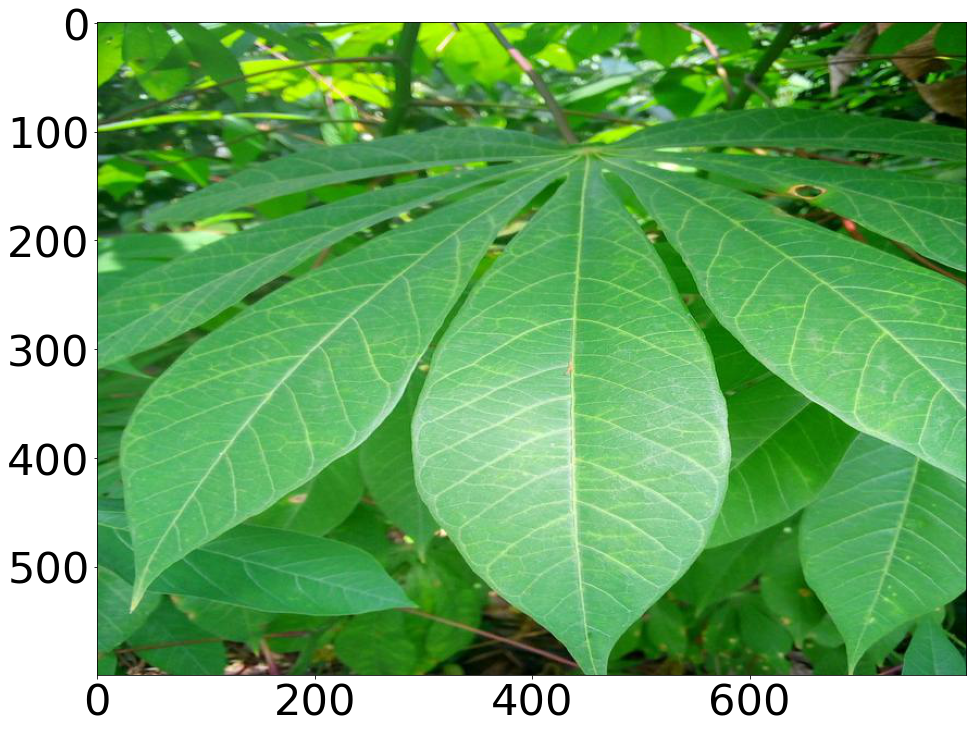

In [ ]:
image = Image.open("/content/sample_data/train_images/4039669211.jpg")
plt.figure(figsize=(16, 12))
plt.imshow(image)
plt.show()

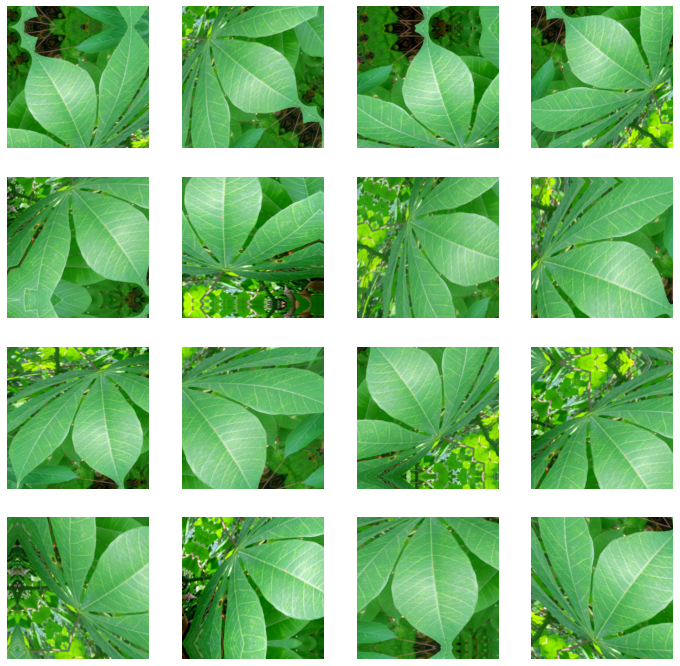

In [ ]:
image = tf.expand_dims(np.array(image), 0)
plt.figure(figsize=(12, 12))

for i in range(16):
  augmented_image = augmentations(image)
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

We can see there some artefacts

CONVOLUTION

In [ ]:
image = tf.io.read_file("/content/sample_data/train_images/4039669211.jpg")
image = tf.image.decode_jpeg(image)

kernel = tf.constant([
    [[-1, -1, -1], [-1,  5, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1,  5, -1],[-1, -1, -1]],
    [[-1, -1, -1],[-1,  5, -1],[-1, -1, -1]]
])

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

image_filter_activation = tf.nn.relu(image_filter)
max_pooled = tf.nn.pool(image_filter_activation, window_shape=[2, 2], pooling_type="AVG", strides = [1, 1])


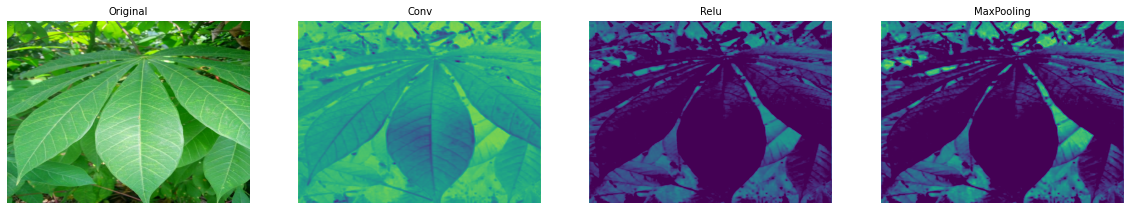

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(tf.squeeze(image))
plt.axis("off")
plt.title("Original")

plt.subplot(1, 4, 2)
plt.title("Conv")
plt.imshow(tf.squeeze(image_filter))
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Relu")
plt.imshow(tf.squeeze(image_filter_activation))
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("MaxPooling")
plt.imshow(tf.squeeze(max_pooled))
plt.axis("off")

plt.show()


